### Метод опорных векторов

#### Цель работы

Изучить работу метода опорных векторов для решения задач классификации и регрессии, познакомиться с основными особенностями и вариациями данного метода. Изучить соответствующие классы библиотеки sklearn, их параметры и атрибуты, применимые на практике.

#### Содержание работы

1. Сгенерируйте линейно разделимый датасет для классификации из двух признаков. Постройте на нем опорно-векторный классификатор без ядра с параметром С=100. Изобразите границу принятия решения и линию зазора на графике.
1. Сгенерируйте линейно неразделимый датасет с зазором между классами. Повторите виуальный анализ на нем.
1. Сгенерируйте неразделимый датасет так, чтобы классы пересекались. Повторите построение и оценку метода опорных векторов на нем.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

#### 1. Сгенерируйте линейно разделимый датасет для классификации из двух признаков. Постройте на нем опорно-векторный классификатор без ядра с параметром С=100. Изобразите границу принятия решения и линию зазора на графике.

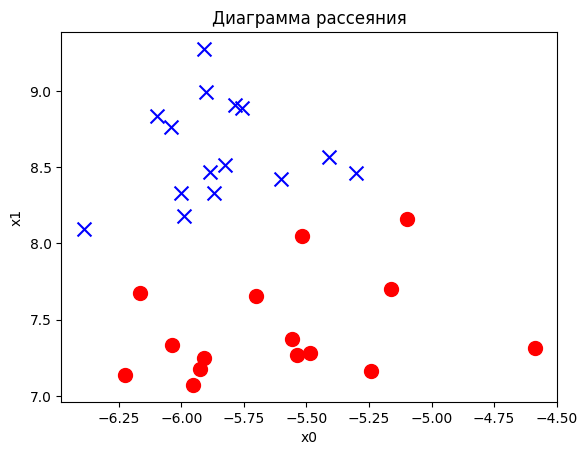

In [2]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.4)
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

In [3]:
from sklearn.svm import SVC
svm_linear = SVC(kernel='linear', C=100)
svm_linear.fit(X, y)

SVC(C=100, kernel='linear')

In [ ]:
svm_linear.coef_

array([[-2.49920793,  6.14683189]])

In [ ]:
svm_linear.intercept_

array([-64.2533988])

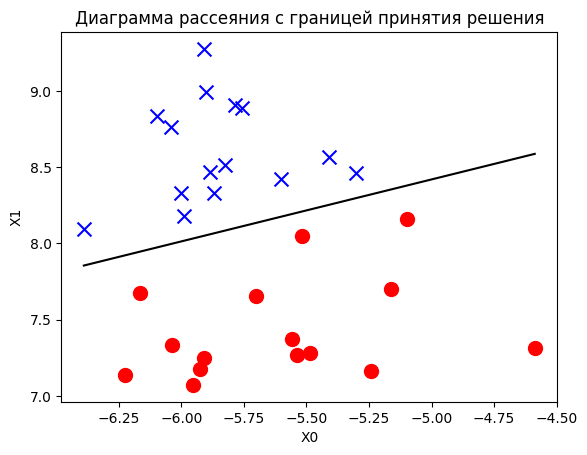

In [6]:
X0 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])

plt.plot(X0,-svm_linear.intercept_[0]/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0, c='k')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c границей принятия решения")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [7]:
print("Опорные вектора: ")
svm_linear.support_vectors_

Опорные вектора: 


array([[-5.51629264,  8.04763857],
       [-5.30025769,  8.46071981],
       [-5.9879581 ,  8.18112559]])

In [8]:
print("Индексы опорных векторов в исходном наборе данных:")
svm_linear.support_

Индексы опорных векторов в исходном наборе данных:


array([ 0,  8, 29], dtype=int32)

Иногда бывает полезно узнать количество опорных векторов. Особенно в задачах множественной классификации, когда опорные вектора соответствуют разным классам. Для этого существует также специальное поле:

In [9]:

svm_linear.n_support_

array([1, 2], dtype=int32)

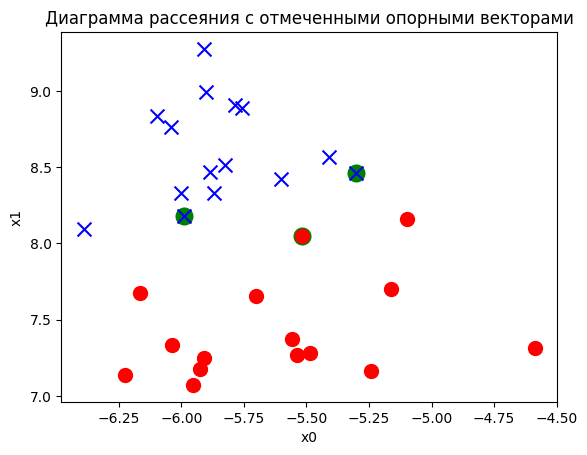

In [10]:
plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c отмеченными опорными векторами")
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

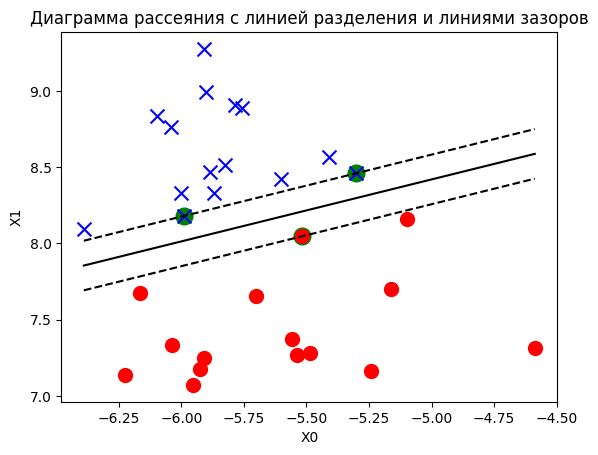

In [11]:
plt.plot(X0,-svm_linear.intercept_[0]/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0, c='k')

plt.plot(X0,(-svm_linear.intercept_[0]-1)/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0,linestyle='--', c='k')
plt.plot(X0,(-svm_linear.intercept_[0]+1)/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0,linestyle='--', c='k')

plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c линией разделения и линиями зазоров")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

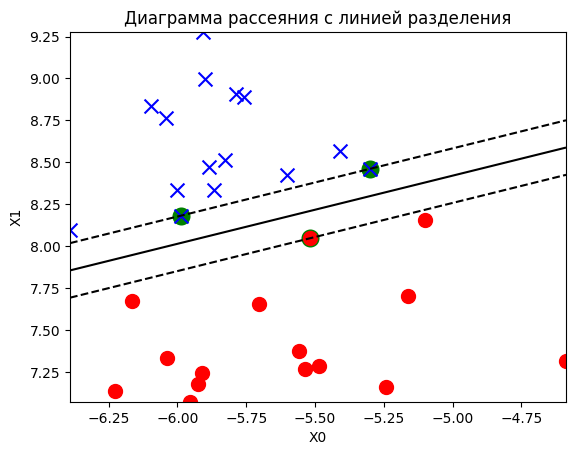

In [12]:
X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), X.shape[0])
X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), X.shape[0])

X0_grid, X1_grid = np.meshgrid(X0, X1)
Z = svm_linear.intercept_[0] + svm_linear.coef_[0][0] * X0_grid +  svm_linear.coef_[0][1] * X1_grid
plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])

plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c линией разделения")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

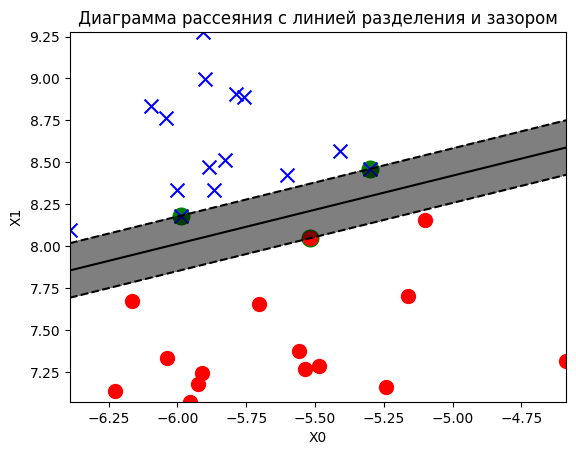

In [13]:
def plot_decision_regions(X, y, model):
    plt.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1], linewidth=7, facecolors='green')

    plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

    X0 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])
    X1 = np.linspace(X[:, 1].min(),X[:, 1].max(), X.shape[0])

    X0_grid, X1_grid = np.meshgrid(X0, X1)
    Z = model.decision_function(np.array([X0_grid.ravel(), X1_grid.ravel()]).T).reshape(X0_grid.shape)
    plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    plt.contourf(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], alpha=0.5)

    plt.title("Диаграмма рассеяния c линией разделения и зазором")
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.show()
plot_decision_regions(X, y, svm_linear)

In [14]:
y_pred =  svm_linear.predict(X)

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y, y_pred)

1.0

In [16]:
confusion_matrix(y, y_pred)

array([[15,  0],
       [ 0, 15]])

In [17]:
observation_new = [[-5.25, 7.5]]

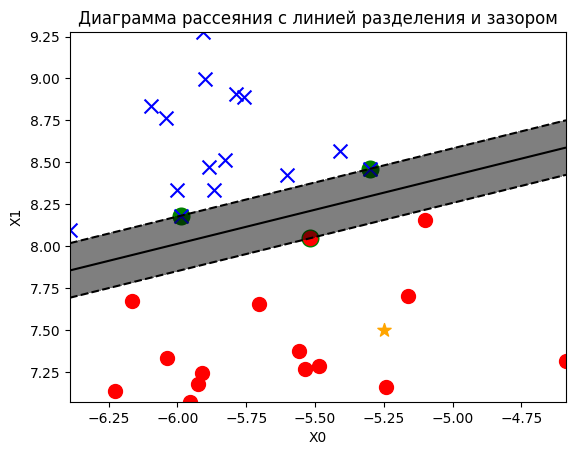

In [18]:
plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', s=100, color='orange')
plot_decision_regions(X, y, svm_linear)

In [19]:
print("Значение функции гипотезы в новой точке")
svm_linear.decision_function(observation_new)

Значение функции гипотезы в новой точке


array([-5.03131797])

In [20]:
print("Предсказанный класс")
svm_linear.predict(observation_new)

Предсказанный класс


array([0])

#### 2. Сгенерируйте линейно неразделимый датасет с зазором между классами. Повторите виуальный анализ на нем.

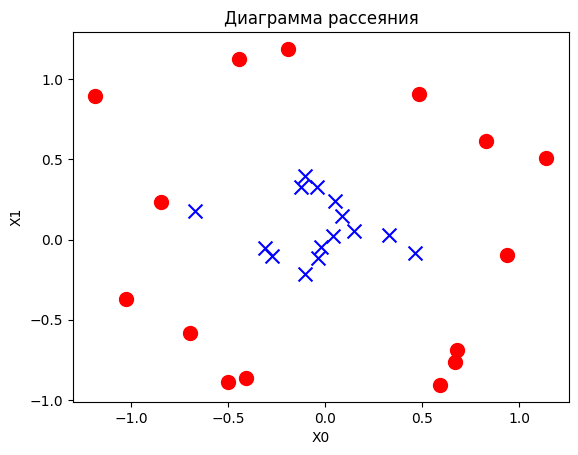

In [21]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=30, random_state=5, factor=.1, noise=.2)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [22]:
svm_rbf = SVC(kernel='rbf', C=100).fit(X, y) # гауссовое ядро
svm_rbf.n_support_

array([6, 2], dtype=int32)

In [23]:
svm_rbf.support_

array([11, 20, 21, 23, 28, 29, 25, 27], dtype=int32)

In [24]:

svm_rbf.support_vectors_

array([[ 0.9388294 , -0.09554628],
       [-0.84682371,  0.23287306],
       [-0.19166925,  1.18895776],
       [-0.69539045, -0.58523359],
       [ 0.68060508, -0.68615145],
       [ 0.48354792,  0.91063288],
       [-0.66975235,  0.17866445],
       [ 0.46427295, -0.08540628]])

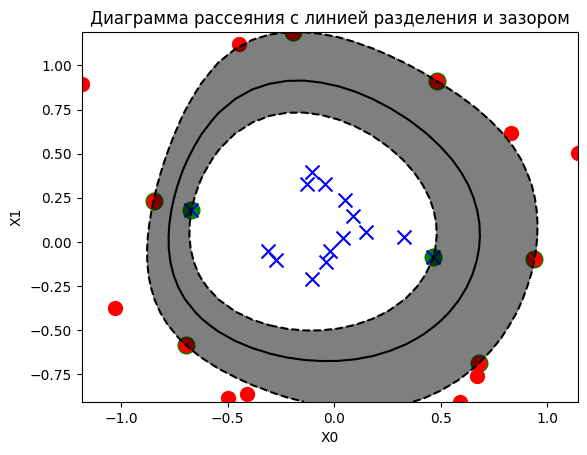

In [25]:
plot_decision_regions(X, y, svm_rbf)

In [26]:
accuracy_score(y, y_pred)

0.4666666666666667

In [27]:

confusion_matrix(y, y_pred)

array([[7, 8],
       [8, 7]])

#### 3. Сгенерируйте неразделимый датасет так, чтобы классы пересекались. Повторите построение и оценку метода опорных векторов на нем.

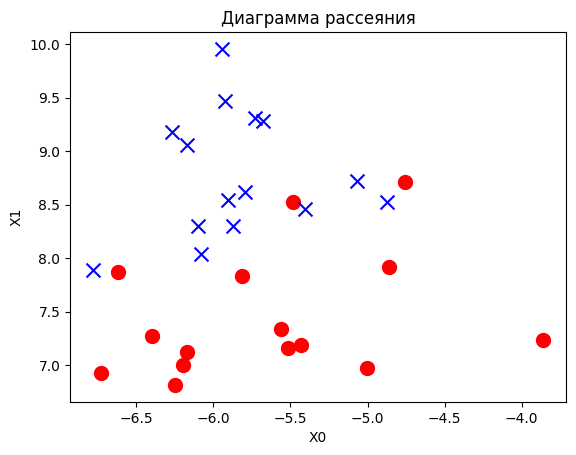

In [28]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.7)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [29]:
svm_poly = SVC(kernel='poly', degree=4, C=2).fit(X, y) # полиноминальное ядро

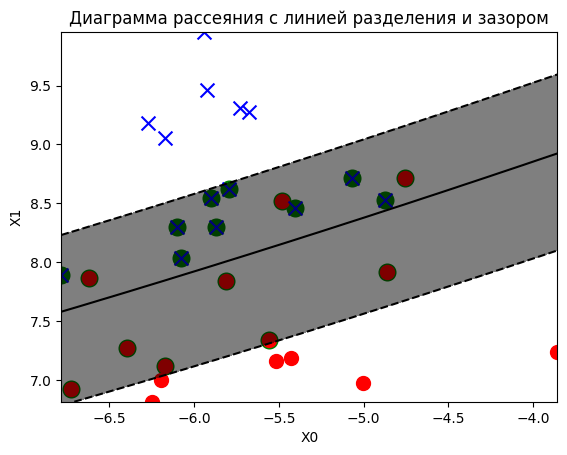

In [30]:
y_pred = svm_poly.predict(X)
plot_decision_regions(X, y, svm_poly)

In [31]:
svm_poly.n_support_

array([9, 9], dtype=int32)

Можно сделать вывод, что чем меньше зазор между классами, тем менее эффективен метод опорных векторов.

In [32]:
accuracy_score(y, y_pred)

0.9

In [33]:
confusion_matrix(y, y_pred)

array([[12,  3],
       [ 0, 15]])

#### Задания для самостоятельного выполнения

1. В первом задании поэкспериментируйте с различными значениями аргумента C класса SVC. Сделайте вывод о том, как он влияет на модель классификации.
1. В первом задании подвигайте точку нового предсказания. Убедитесь, что с другой стороны границы предсказывается другой класс. Как изменяется предсказание, если точка ляжет внутрь полосы зазора?
1. Во втором задании повторите анализ с методом опорных векторов с другими видами ядер. Сравните вид границы принятия решения и показатели точности модели. 
1. В третьем задании поэкспериментируйте со значением аргумента C. Сделайтевывод о том, как он влияет на модель. 
1. В третьем задании примените классификатор без ядра. Познакомьтесь и примените класс Linear_SVC. 
1. Сгенерируйте датасет для классификации из 1000 точек и 5 атрибутов. Попробуйте применить метод опорных векторов на нем. Найдите методом подбора наилучшее ядро и значение С.
1. Попробуйте данную модель с большим количеством точек. На каком количестве обучение начинает занимать существенное время?
1. Примените метод опорных векторов для задачи множественной классификации. Самостоятельно сгенерируйте визуализируемый датасет для этой задачи. Поробуйте изобразить границу принятия решений и зазор.
2. Выберите из библиотеки sklearn готовый датасет для классификации и попробуйте смоделировать его при помощи метода опорных векторов.
3. Повторите такой же анализ для задачи регрессии и соответствующего датасета.

#### 1. В первом задании поэкспериментируйте с различными значениями аргумента C класса SVC. Сделайте вывод о том, как он влияет на модель классификации.

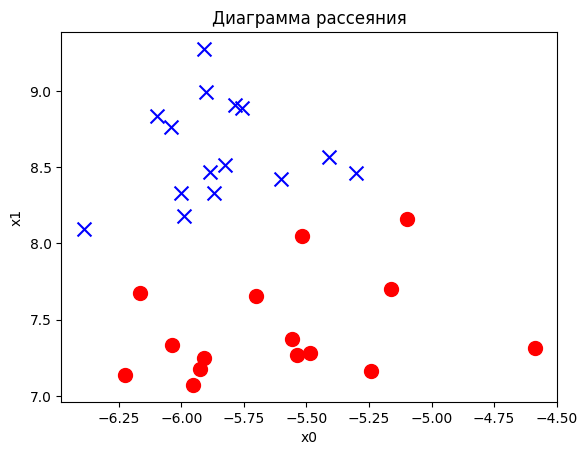

In [34]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.4)
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

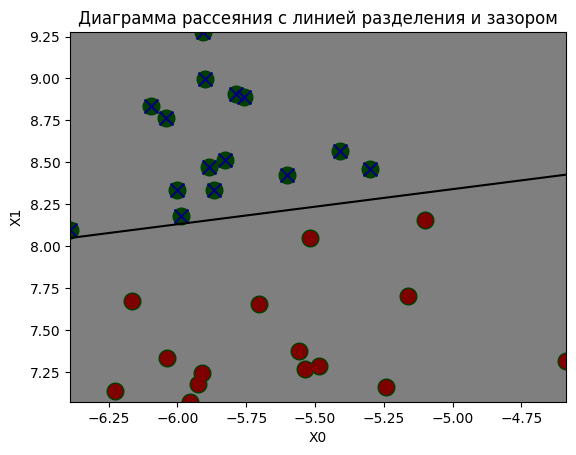


Accuracy=  1.0
[[15  0]
 [ 0 15]]


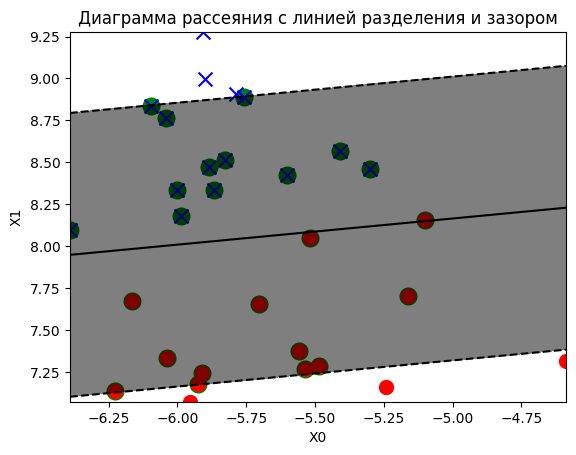


Accuracy=  0.9666666666666667
[[14  1]
 [ 0 15]]


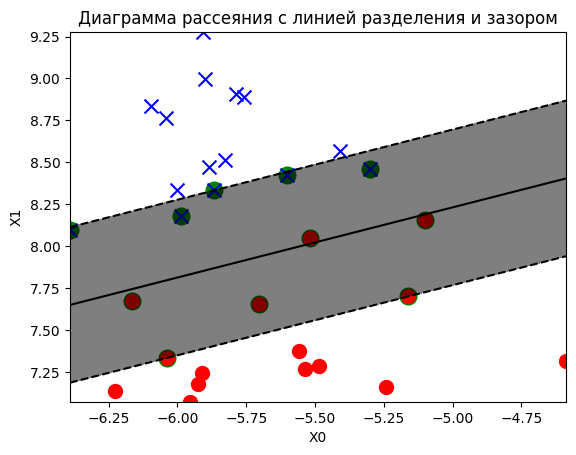


Accuracy=  0.9666666666666667
[[14  1]
 [ 0 15]]


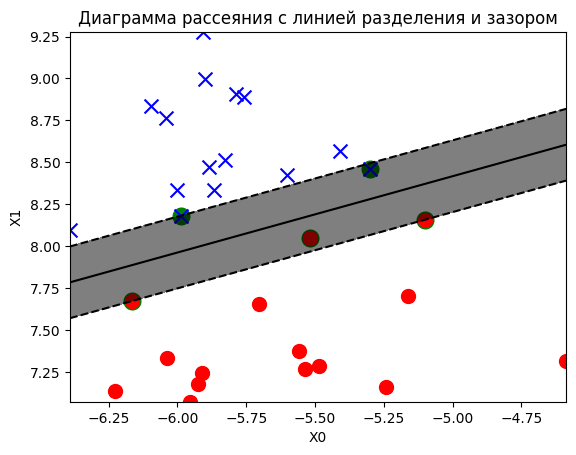


Accuracy=  1.0
[[15  0]
 [ 0 15]]


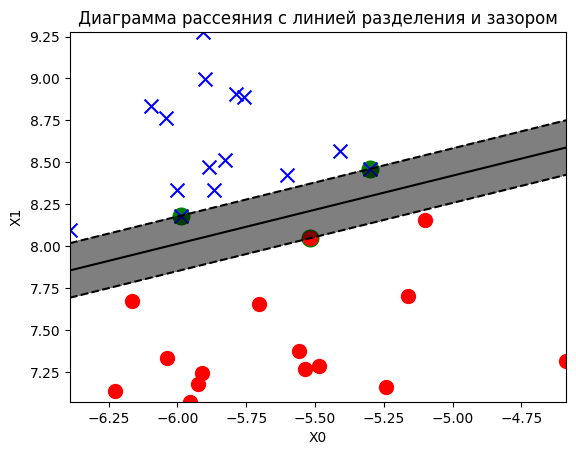


Accuracy=  1.0
[[15  0]
 [ 0 15]]


In [35]:
for c in [0.01, 0.1, 1, 10, 100]:
    svm_linear = SVC(kernel='linear', C=c)
    svm_linear.fit(X, y)
    plot_decision_regions(X, y, svm_linear)
    y_pred =  svm_linear.predict(X)
    print()
    print("Accuracy= ", accuracy_score(y, y_pred))
    print(confusion_matrix(y, y_pred))

#### 2. В первом задании подвигайте точку нового предсказания. Убедитесь, что с другой стороны границы предсказывается другой класс. Как изменяется предсказание, если точка ляжет внутрь полосы зазора?

In [36]:
observation_new = [[-6.25, 8.25], [-6, 7.5], [-5.75, 8]]

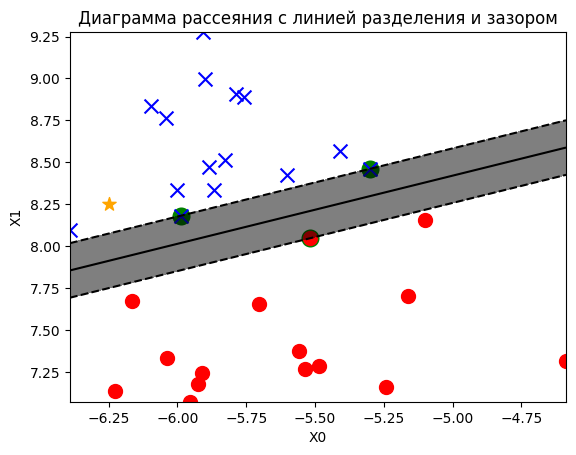

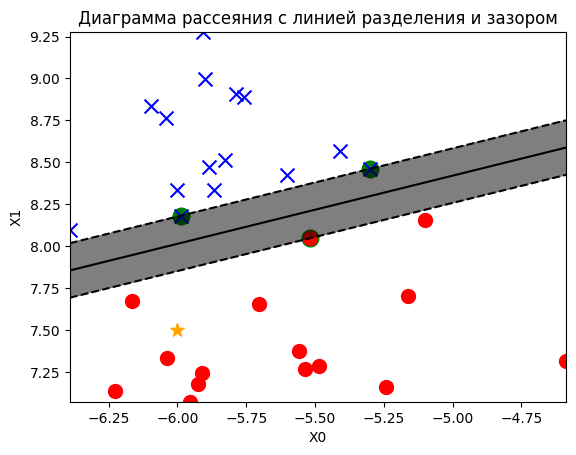

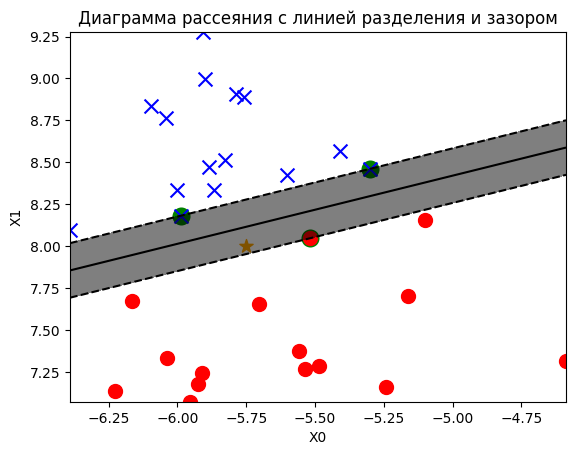

In [37]:
for o_n in observation_new:
    plt.scatter(o_n[0], o_n[1], marker='*', s=100, color='orange')
    plot_decision_regions(X, y, svm_linear)

In [38]:
svm_linear.predict(observation_new)

array([1, 0, 0])

#### 3. Во втором задании повторите анализ с методом опорных векторов с другими видами ядер. Сравните вид границы принятия решения и показатели точности модели.

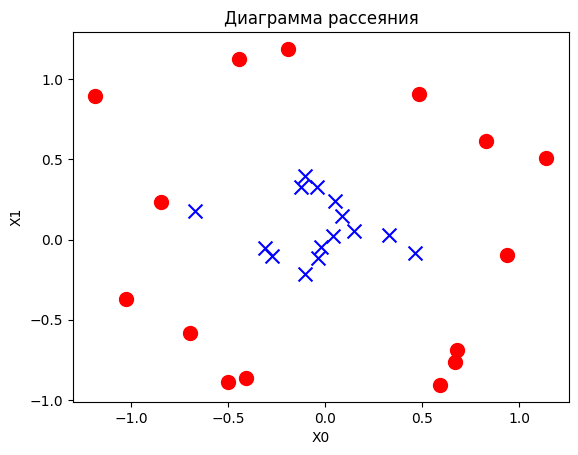

In [39]:
X, y = make_circles(n_samples=30, random_state=5, factor=.1, noise=.2)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [40]:
svm_linear = SVC(kernel='linear', C=100).fit(X, y)
svm_poly = SVC(kernel='poly', C=100).fit(X, y)

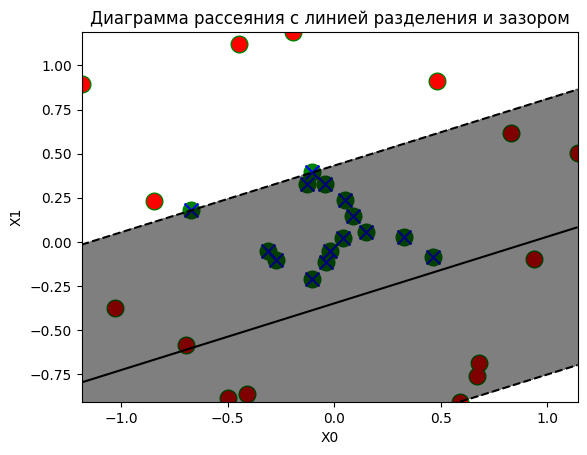

In [41]:

plot_decision_regions(X, y, svm_linear)

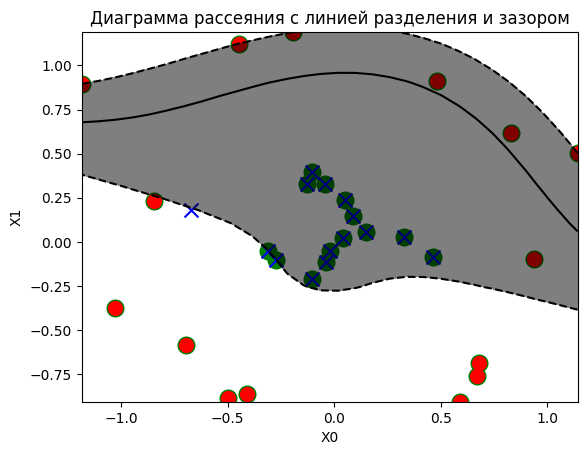

In [42]:

plot_decision_regions(X, y, svm_poly)

In [43]:
y_pred_linear = svm_linear.predict(X)
y_pred_poly = svm_poly.predict(X)

In [44]:

accuracy_score(y, y_pred_linear)

0.7

In [45]:
confusion_matrix(y,y_pred_linear)

array([[ 6,  9],
       [ 0, 15]])

In [46]:

accuracy_score(y, y_pred_poly)

0.7

In [47]:

confusion_matrix(y, y_pred_poly)

array([[ 6,  9],
       [ 0, 15]])

#### 4. В третьем задании поэкспериментируйте со значением аргумента C. Сделайте вывод о том, как он влияет на модель.

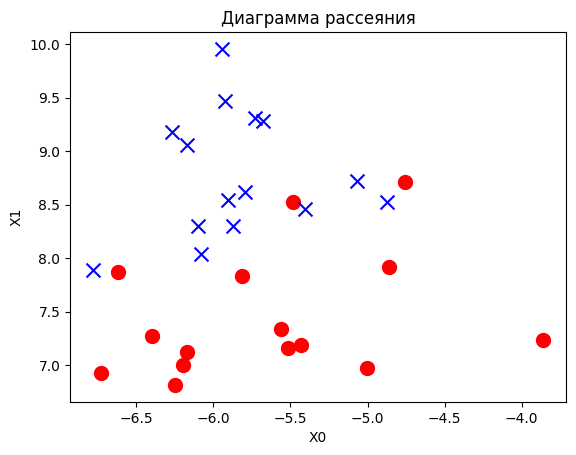

In [48]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.7)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

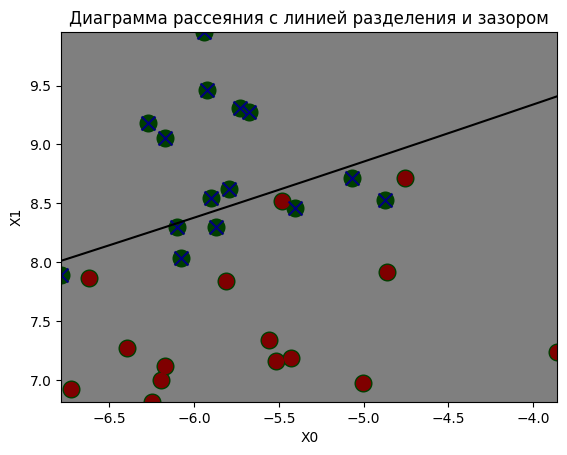


Accuracy=  0.7666666666666667
[[15  0]
 [ 7  8]]


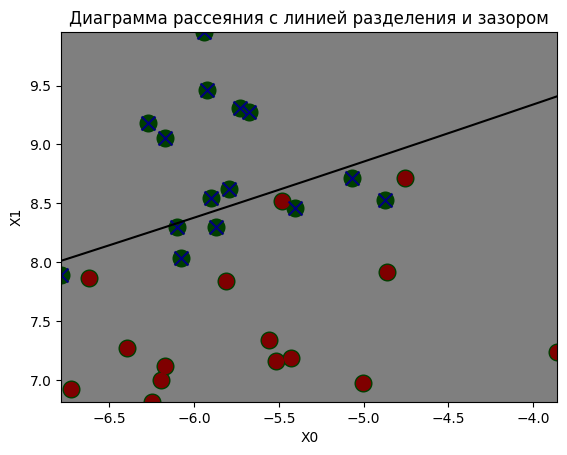


Accuracy=  0.7666666666666667
[[15  0]
 [ 7  8]]


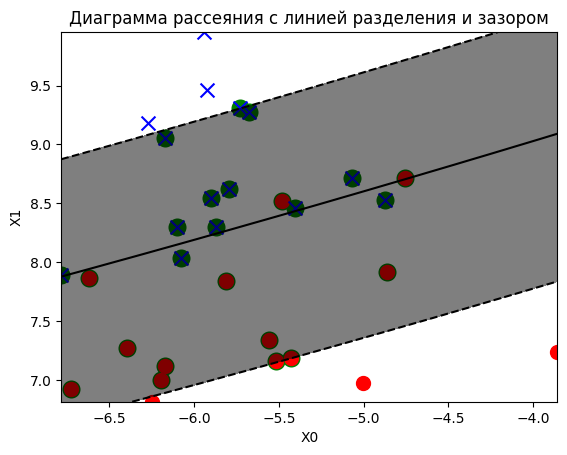


Accuracy=  0.8666666666666667
[[13  2]
 [ 2 13]]


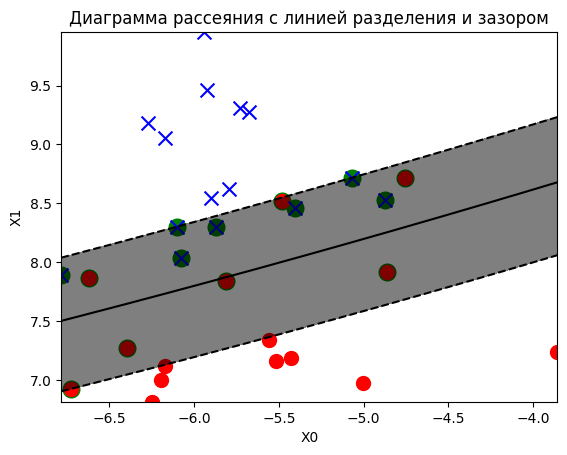


Accuracy=  0.9
[[12  3]
 [ 0 15]]


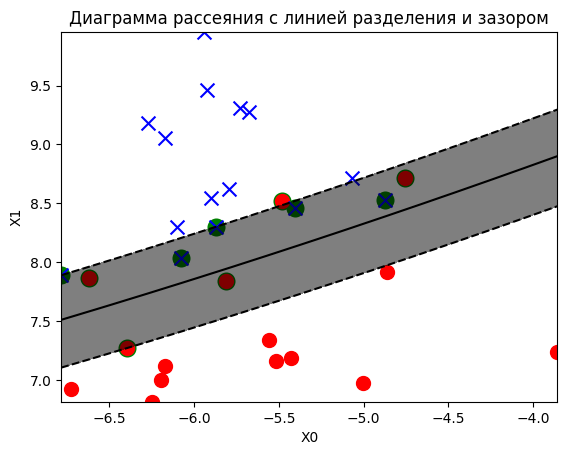


Accuracy=  0.9
[[12  3]
 [ 0 15]]


In [49]:
for c in [0.01, 0.1, 1, 10, 100]:
    svm_poly = SVC(kernel='poly', C=c).fit(X, y)
    plot_decision_regions(X, y, svm_poly)
    y_pred =  svm_poly.predict(X)
    print()
    print("Accuracy= ", accuracy_score(y, y_pred))
    print(confusion_matrix(y, y_pred))

#### 5. В третьем задании примените классификатор без ядра. Познакомьтесь и примените класс Linear_SVC.

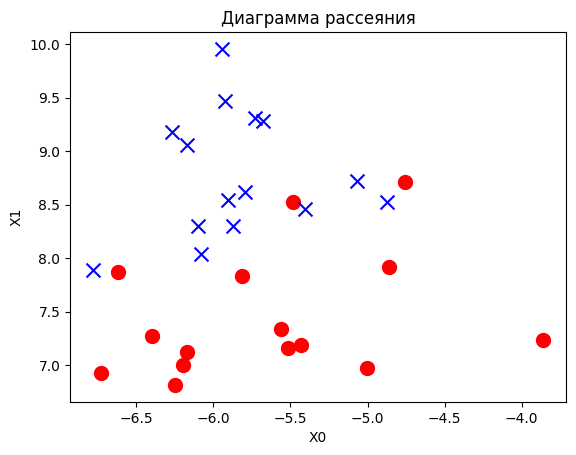

In [50]:
from sklearn.svm import LinearSVC
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.7)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [51]:
svm_linear = LinearSVC(C=100).fit(X, y)
y_pred = svm_linear.predict(X)
accuracy_score(y, y_pred)

0.9

In [52]:

confusion_matrix(y, y_pred)

array([[12,  3],
       [ 0, 15]])

#### 6. Сгенерируйте датасет для классификации из 1000 точек и 5 атрибутов. Попробуйте применить метод опорных векторов на нем. Найдите методом подбора наилучшее ядро и значение С.

In [53]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
X, y = make_classification(n_samples=1000, n_features=5, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
param_grid = {
    'C': [0.1, 1, 10, 100],  
    'kernel': ['linear', 'poly', 'rbf']  
}
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

In [54]:
best_params = grid_search.best_params_
best_params

{'C': 100, 'kernel': 'rbf'}

In [55]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [56]:
best_params, accuracy

({'C': 100, 'kernel': 'rbf'}, 0.875)

#### 7. Попробуйте данную модель с большим количеством точек. На каком количестве обучение начинает занимать существенное время?

In [57]:
import time 
sizes = [1000, 5000, 10000, 25000, 50000]
train_times = []
for n_samples in sizes:
    X, y = make_classification(n_samples=n_samples, n_features=5, n_classes=2, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = SVC(C=100, kernel='rbf')
    
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    
    train_time = end_time - start_time
    train_times.append((n_samples, train_time))

In [58]:
timings_df = pd.DataFrame(train_times, columns=['n_samples', 'train_time'])
timings_df

,n_samples,train_time
0,1000,0.155461
1,5000,2.636946
2,10000,3.008145
3,25000,20.939213
4,50000,13.584321


#### 8. Примените метод опорных векторов для задачи множественной классификации. Самостоятельно сгенерируйте визуализируемый датасет для этой задачи. Поробуйте изобразить границу принятия решений и зазор.

In [59]:
X, y = make_classification(n_samples=500, n_features=2, n_classes=3, n_redundant=0, n_clusters_per_class=1, random_state=42)

In [60]:
svm_model = SVC(kernel='rbf', C=1, decision_function_shape='ovo')
svm_model.fit(X, y)

SVC(C=1, decision_function_shape='ovo')

In [61]:
xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 500),
                     np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 500))
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

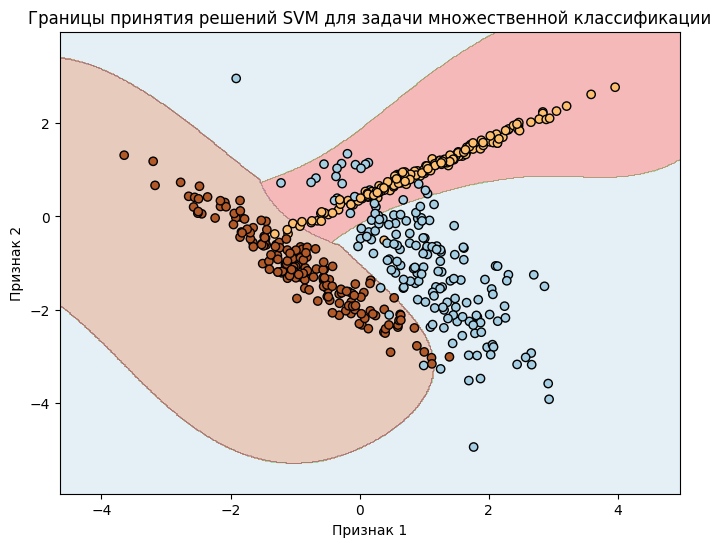

In [62]:
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')

plt.title("Границы принятия решений SVM для задачи множественной классификации")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.show()

In [63]:

accuracy_score(y, svm_model.predict(X))

0.924

#### 9. Выберите из библиотеки sklearn готовый датасет для классификации и попробуйте смоделировать его при помощи метода опорных векторов.

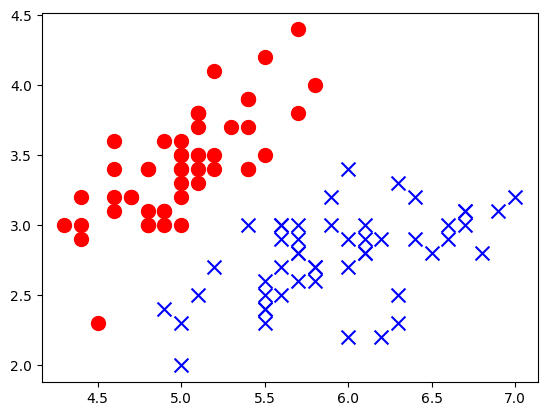

In [64]:
from sklearn.datasets import load_iris 
from sklearn.discriminant_analysis import StandardScaler
data = load_iris()
X = data.data
y = data.target
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

In [65]:
mask = y < 2
X_binary = X[mask]
y_binary = y[mask]

In [66]:
scaler = StandardScaler()
X_binary = scaler.fit_transform(X_binary)

In [67]:
svm_poly = SVC(kernel='poly', C=100, degree=3)
svm_poly.fit(X_binary, y_binary)

SVC(C=100, kernel='poly')

In [68]:
y_pred = svm_poly.predict(X_binary)
print("Accuracy=", accuracy_score(y_binary, y_pred))
print(confusion_matrix(y_binary, y_pred))

Accuracy= 1.0
[[50  0]
 [ 0 50]]


#### 10. Повторите такой же анализ для задачи регрессии и соответствующего датасета.

In [69]:
from sklearn.datasets import fetch_california_housing
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
data = fetch_california_housing()
X = data.data
y = data.target

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
svm_linear = SVR(kernel='linear', C=1.0)
svm_linear.fit(X_train, y_train)

SVR(kernel='linear')

In [71]:
y_pred =svm_linear.predict(X_test)
print("MSE=", mean_squared_error(y_test, y_pred))
print("R2=", r2_score(y_test, y_pred))

MSE= 0.579266799843904
R2= 0.557949610035857


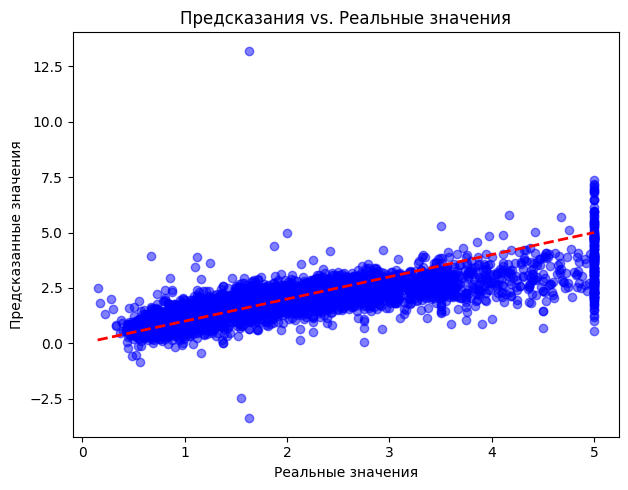

In [72]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r', lw=2)
plt.xlabel("Реальные значения")
plt.ylabel("Предсказанные значения")
plt.title("Предсказания vs. Реальные значения")
plt.tight_layout()
plt.show()